## Set Up

In [2]:
# Imports
import pyxdf
import matplotlib.pyplot as plt
import numpy as np

# Load file
streams, header = pyxdf.load_xdf('test.xdf')

## Graph of all event markers and their information

"['Chills Reported']" of type "Chills Reported" at t = 536.84s
"['Chills Reported']" of type "Chills Reported" at t = 545.76s
"['Chills Reported']" of type "Chills Reported" at t = 548.10s
"['Chills Reported']" of type "Chills Reported" at t = 552.38s
"['Chills Reported']" of type "Chills Reported" at t = 595.56s
"['Chills Reported']" of type "Chills Reported" at t = 599.57s
"['Chills Reported']" of type "Chills Reported" at t = 601.66s
"['Chills Reported']" of type "Chills Reported" at t = 608.17s
"['Chills Reported']" of type "Chills Reported" at t = 610.94s
"['Chills Reported']" of type "Chills Reported" at t = 647.71s
"['Chills Reported']" of type "Chills Reported" at t = 658.23s
"['Chills Reported']" of type "Chills Reported" at t = 659.89s
"['Chills Reported']" of type "Chills Reported" at t = 661.19s
"['Chills Reported']" of type "Chills Reported" at t = 661.84s
"['Chills Reported']" of type "Chills Reported" at t = 664.83s
"['Chills Reported']" of type "Chills Reported" at t = 

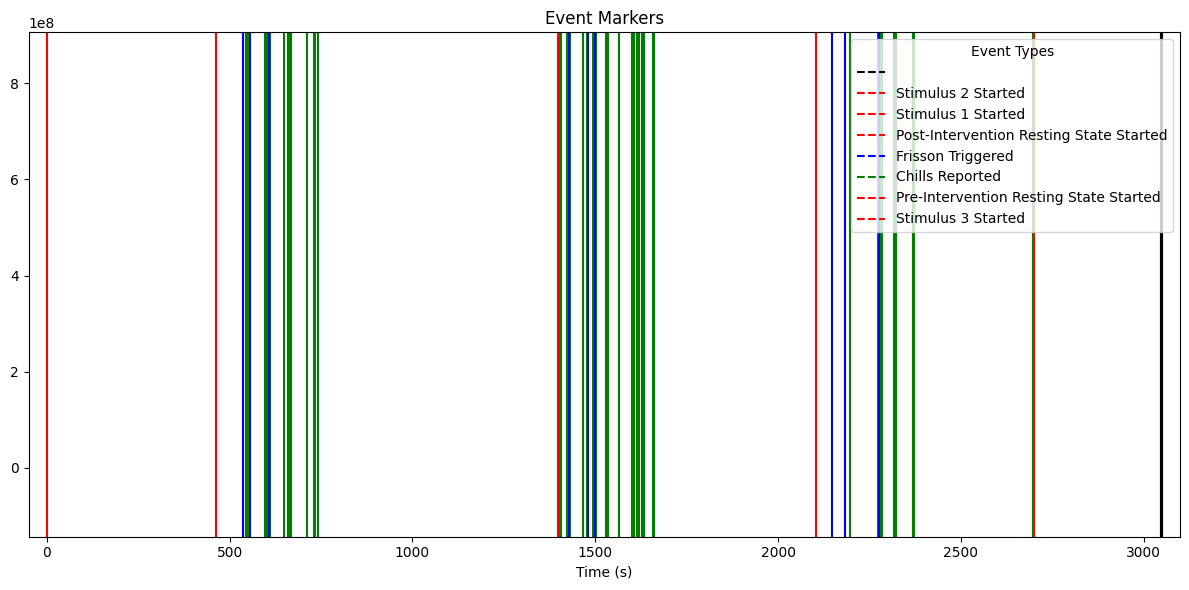

In [3]:
events = []

# Define a color map for different event types
colors = {
    'Pre-Intervention Resting State Started': 'red',
    'Post-Intervention Resting State Started': 'red',
    'Chills Reported': 'green',
    'Frisson Triggered': 'blue',
    'Stimulus 1 Started': 'red',
    'Stimulus 2 Started': 'red',
    'Stimulus 3 Started': 'red'
}

# Create a plot
plt.figure(figsize=(12, 6))

for stream in streams:
    y = stream['time_series']

    if isinstance(y, list):
        # List of strings, draw one vertical line for each marker
        for timestamp, marker in zip(stream['time_stamps'], y):
            adjusted_time = timestamp - 1977181.62 # Properly shift the time
            event_type = marker[0]  # Assuming the first character represents the event type
            color = colors.get(event_type, 'black')  # Default to black if event type not found
            plt.axvline(x=adjusted_time, linestyle = '-', color = color)
            print(f'"{marker}" of type "{event_type}" at t = {adjusted_time:.2f}s')
            events.append((event_type, adjusted_time, color))
    elif isinstance(y, np.ndarray):
        plt.plot(stream['time_stamps'], y)
    else:
        raise RuntimeError('Unknown stream format')

# Set x-axis limits
plt.xlim(-50, max(event[1] for event in events) + 50) 

# Set plot labels and title
plt.xlabel('Time (s)')
plt.ylabel('')
plt.title('Event Markers')

# Create custom legend for event types
unique_events = set(event[0] for event in events)
handles = [plt.Line2D([0], [0], color = colors.get(event_type, 'black'), linestyle = '--', label = event_type) for event_type in unique_events]
plt.legend(handles = handles, title = 'Event Types', loc = 'upper right')

# Show the plot
plt.tight_layout()
plt.show()